# Ford GoBike System Exploratory Data Analysis
## by Wahab Hamed Ayomide





## Investigation Overview


> In this investigation, we will analyze the time of the day and day of the week that most trips are taken, the type of users taking the rides and the duration of the rides.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

- There are 183,412 rides made in the dataset with 16 details ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip') about the rides.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#dropping irrelevant columns to the analysis
df.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude',
         'end_station_longitude', 'bike_id', 'bike_share_for_all_trip', 'member_birth_year'], axis=1, inplace=True)
#changing the start time and end time to datetime datatype
df.start_time = pd.to_datetime(df['start_time'])
df.end_time = pd.to_datetime(df['end_time'])
#adding a derived column for days of the week
df['day_of_week'] = df.apply(lambda row: row.start_time.day_name(), axis = 1)

#creating a time of day column i.e morning, afternoon, evening and night
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['day_time'] = 'Morning'
df['day_time'][(df['start_hour'] >= 12) & (df['start_hour'] <= 16)] = 'Afternoon'
df['day_time'][(df['start_hour'] > 16) & (df['start_hour'] <= 19)] = 'Evening'
df['day_time'][(df['start_hour'] > 19) & (df['start_hour'] <= 23)] = 'Night'

## Rides during time of day (Morning/Afternoon/Evening/Night)

The below visualization shows that number of rides taken on different time of the day (Morning/Afternoon/Evening/Night).
   - It could be seen from the plot that the time of the day with the most rides is Morning (00:00 - 11:59 hours of the day) followed by Afternoon and Evening, then Night. Understandably, the least number of rides are taken in the night.

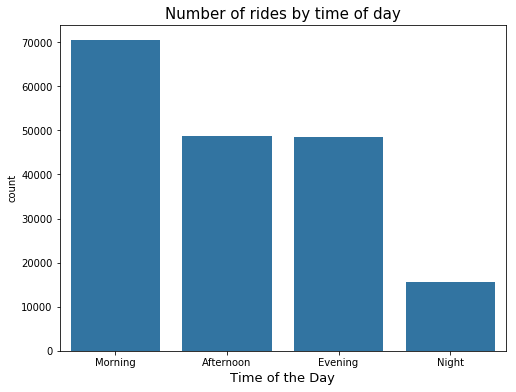

In [4]:
# plot a distribution of the number of rides by time of day
base_color = sns.color_palette()[0]
time = ['Morning', 'Afternoon', 'Evening', 'Night']
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_time', order = time, color = base_color);
plt.title('Number of rides by time of day', fontsize = 15)
plt.xlabel('Time of the Day', fontsize = 13)
plt.show()

##  Rides by User types

As evidently seen from the plot, most trips (about 89%) are taken by the subscribers with the remaining (about 11%) being just casual riders.

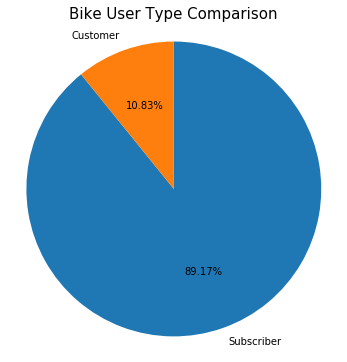

In [5]:
# plot a distribution of the number of rides by user type
plt.figure(figsize=(8,6))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type Comparison', fontsize=15);

## Service Usage by Day of the Week and User type

From the plot,  the day of the week that most rides are taken (Thursday) is not dependent on if the user is a subscriber or a customer. Although, we can see the reduced number of rides from subscribers on weekends. This could mean that subscribers might be regularly using the bikes for work and home commute purposes and customers use it for recreational or exercise activities during weekends.



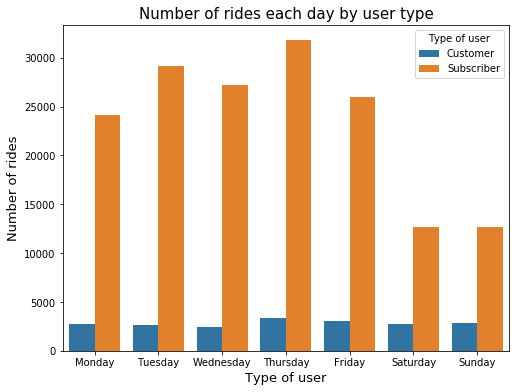

In [6]:
#plot the distribution of number of rider each day by user type
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_of_week', hue = 'user_type', order = weekday)
plt.xlabel('Type of user', fontsize=13)
plt.ylabel('Number of rides', fontsize=13)
plt.title('Number of rides each day by user type', fontsize=15)
plt.legend(title = 'Type of user');

## Hourly Usage per Day

Most Subscribers use the service at peak hour (8am and 5pm). In contrast, Customers have more flexible time mostly in early hours of the evening (5pm)

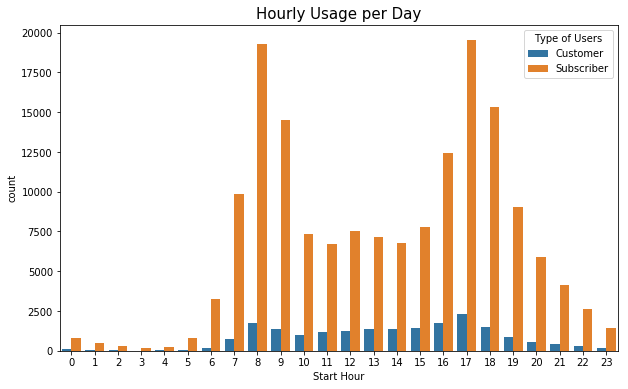

In [7]:
#plot the hour usage per day distribution
plt.figure(figsize=(10,6))
chart = sns.countplot(data=df, x='start_hour', hue='user_type')
plt.title('Hourly Usage per Day', fontsize=15)
chart.set(xlabel='Start Hour', ylabel='count')
plt.legend(title = 'Type of Users')
plt.show()

## Ride Duration by Day of the Week and User type

On each day of the week, customer rides lasted longer than the subscriber users and even more significantly on weekends.


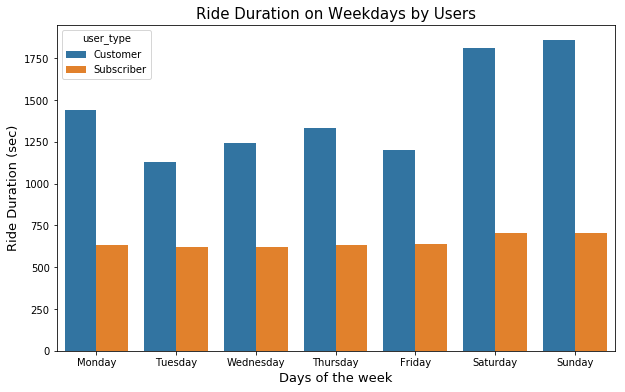

In [8]:
#plot the ride duration on days of the week by users
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day_of_week', y='duration_sec', ci=None, hue='user_type', order = weekday)
plt.title('Ride Duration on Weekdays by Users', fontsize=15);
plt.xlabel ('Days of the week', fontsize=13)
plt.ylabel('Ride Duration (sec)', fontsize=13)
plt.show()

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 380401 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: